In [1]:
!pwd

/home/cccr/supriyo/panini/filtered_data/historical/JGRJD/SVR


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import hilbert_data1_jgrjd_20CRV3_36


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier, plot_tree, XGBRegressor
import numpy as np
from sklearn.multioutput import MultiOutputRegressor
#import hilbert_data 

### Test and Train Splitter:

In [4]:
x_train,_,y_train = hilbert_data1_jgrjd_20CRV3_36.data_hilbert(datetime.datetime(1979,1,1),datetime.datetime(2008,12,31))
# x_test,_,y_test = hilbert_data1_jgrjd_20CRV3_36.data_hilbert(datetime.datetime(1974,6,1),datetime.datetime(1978,3,16))
x_test,_,y_test = hilbert_data1_jgrjd_20CRV3_36.data_hilbert(datetime.datetime(2009,1,1),datetime.datetime(2015,12,31))

In [5]:
#x_test = pd.concat([x_test1,x_test2],axis=0)
#y_test = pd.concat([y_test1,y_test2],axis=0)

In [6]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
#y_train.head()

(10839, 36) (10839, 1) (2437, 36) (2437, 1)


In [7]:
# x_train[(x_train < -500.0)] = -500.0
# x_train[(x_train > 500.0)]  = 500.0

In [8]:
#x_train['max'] = x_train.iloc[:,0:12].max(axis=1)
#x_train['min'] = x_train.iloc[:,0:12].min(axis=1)
#x_train['std'] = x_train.iloc[:,0:12].std(axis=1)

#x_test['max'] = x_test.iloc[:,0:12].max(axis=1)
#x_test['min'] = x_test.iloc[:,0:12].min(axis=1)
#x_test['std'] = x_test.iloc[:,0:12].std(axis=1)

In [9]:
#x_train['doy'] = x_train.index.dayofyear
#x_test['doy']  = x_test.index.dayofyear

#### Historical pressure

In [10]:
x_test3 = hilbert_data1_jgrjd_20CRV3_36.data_pres(datetime.datetime(1905,1,1),datetime.datetime(2015,12,31))

# x_test3[(x_test3 < -500.0)] = -500.0
# x_test3[(x_test3 > 500.0)]  = 500.0
#x_test3['doy'] = x_test3.index.dayofyear

#x_test3['max'] = x_test3.iloc[:,0:12].max(axis=1)
#x_test3['min'] = x_test3.iloc[:,0:12].min(axis=1)
#x_test3['std'] = x_test3.iloc[:,0:12].std(axis=1)
x_test3.shape

(40423, 36)

/home/cccr/supriyo/.conda/envs/knp_ai/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'RMM2')

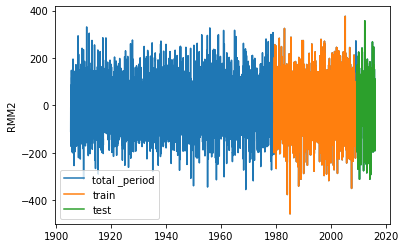

In [11]:
plt.plot(x_test3.iloc[:,0],label = 'total _period')
plt.plot(x_train.iloc[:,0], label = 'train')
plt.plot(x_test.iloc[:,0], label = 'test')
plt.legend()
plt.ylabel('RMM2')

#### scale the data

In [12]:
from sklearn.preprocessing import MinMaxScaler

sc3 = MinMaxScaler()
sc5 = MinMaxScaler()

sc5.fit(x_test3[:])

test_x3 =  sc5.transform(x_test3[:])
train_x = sc5.transform(x_train[:])
test_x  = sc5.transform(x_test[:])


sc3.fit(y_train[:])

train_y = sc3.transform(y_train)
test_y  = sc3.transform(y_test)

train_x.max(),test_x.max(),test_x3.max(),train_y.max(),test_y.max()

(1.0469156527704322,
 1.104979549116266,
 1.0000000000000002,
 0.9999999999999999,
 1.0093241193958034)

(array([6.000e+00, 9.000e+00, 1.800e+01, 4.000e+01, 8.500e+01, 1.720e+02,
        3.330e+02, 5.450e+02, 8.040e+02, 1.260e+03, 1.873e+03, 2.867e+03,
        3.977e+03, 5.090e+03, 6.513e+03, 7.966e+03, 8.826e+03, 9.167e+03,
        8.804e+03, 7.480e+03, 6.470e+03, 5.065e+03, 3.755e+03, 2.593e+03,
        1.698e+03, 1.116e+03, 5.980e+02, 2.950e+02, 1.650e+02, 7.700e+01,
        3.200e+01, 9.000e+00, 8.000e+00, 9.000e+00, 7.000e+00]),
 array([0.00543077, 0.03684645, 0.06826213, 0.09967781, 0.13109349,
        0.16250917, 0.19392485, 0.22534053, 0.25675621, 0.28817189,
        0.31958757, 0.35100325, 0.38241893, 0.4138346 , 0.44525028,
        0.47666596, 0.50808164, 0.53949732, 0.570913  , 0.60232868,
        0.63374436, 0.66516004, 0.69657572, 0.7279914 , 0.75940708,
        0.79082276, 0.82223844, 0.85365411, 0.88506979, 0.91648547,
        0.94790115, 0.97931683, 1.01073251, 1.04214819, 1.07356387,
        1.10497955]),
 <a list of 35 Patch objects>)

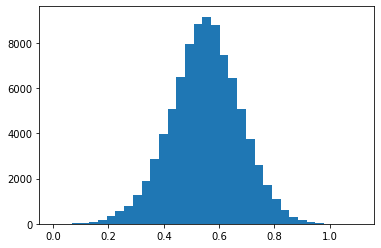

In [13]:
plt.hist(test_x.flatten(),bins=35)

### XGBOOST

In [14]:
#model = MultiOutputRegressor(XGBRegressor(objective='reg:squarederror'))
model = MultiOutputRegressor(XGBRegressor(objective='reg:squarederror'))

In [15]:
model.estimator

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [16]:
train_x.shape

(10839, 36)

#### Predict XGBOOST forest for rmm2

In [17]:
model.fit(train_x, train_y)

Y_prediction_rmm2 = model.predict(test_x)

acc_xgboost       = round(model.score(test_x, test_y) * 100, 2)

print("Accuracy of base Xgboost model is ,",acc_xgboost)

Accuracy of base Xgboost model is , 62.29


training shape = 
(10839, 1)


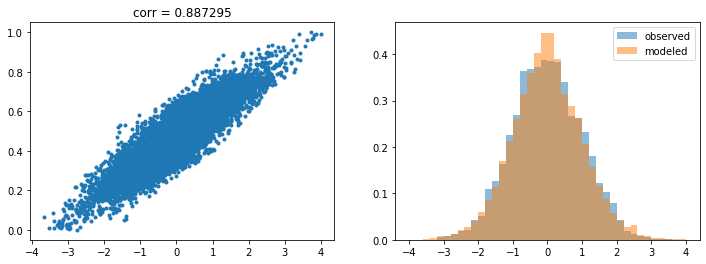

In [18]:
predict1   = model.predict(train_x)
yy_train   = sc3.inverse_transform(predict1)
yy_train   = yy_train/yy_train.std()
train_corr = np.corrcoef(yy_train[:,0],train_y[:,0])[0,1]

print("training shape = ");print(predict1.shape)

fig,ax = plt.subplots(1,2,figsize = (12,4))

ax[0].plot(yy_train[:,0],train_y,'.')

ax[0].set_title('corr = %f'%train_corr)

bins = np.linspace(-4.0,4.0,41)

ax[1].hist(y_train.rmm2,bins,density=True,alpha=0.5,label='observed')
ax[1].hist(yy_train,bins,density=True,alpha=0.5,label='modeled');
plt.legend()

test shape = 
(2437, 1)


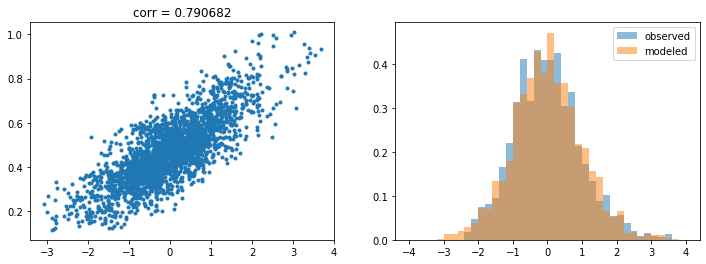

In [19]:
predict2  = model.predict(test_x)
yy_test   = sc3.inverse_transform(predict2)
yy_test   = yy_test/yy_test.std()
test_corr = np.corrcoef(yy_test[:,0],test_y[:,0])[0,1]

print("test shape = ");print(predict2.shape)

fig,ax = plt.subplots(1,2,figsize = (12,4))

ax[0].plot(yy_test[:,0],test_y,'.')

ax[0].set_title('corr = %f'%test_corr)

bins = np.linspace(-4.0,4.0,41)

ax[1].hist(y_test.rmm2,bins,density=True,alpha=0.5,label='observed')
ax[1].hist(yy_test,bins,density=True,alpha=0.5,label='modeled');
plt.legend()

## Support vector regressor

In [20]:
from sklearn.svm import SVR# most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. We have a non-linear condition #so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.regressor = SVR(kernel='rbf')
regressor = SVR(kernel='rbf',gamma='auto',C=1)

regressor.fit(train_x, train_y)

Y_prediction_rmm2 = regressor.predict(test_x)

acc_svr       = round(regressor.score(test_x, test_y) * 100, 2)

print("Accuracy of base SVR model is ,",(acc_svr/100)**0.5)

/home/cccr/supriyo/.conda/envs/knp_ai/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of base SVR model is , 0.8218880702382776


training shape = 
(10839,)


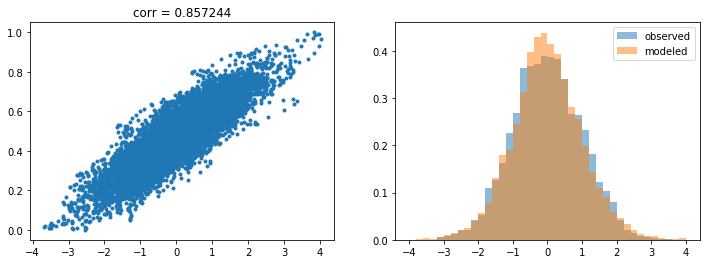

In [21]:
predict1   = regressor.predict(train_x)
yy_train   = sc3.inverse_transform(predict1[:,None])
yy_train   = yy_train/yy_train.std()
train_corr = np.corrcoef(yy_train[:,0],train_y[:,0])[0,1]

print("training shape = ");print(predict1.shape)

fig,ax = plt.subplots(1,2,figsize = (12,4))

ax[0].plot(yy_train[:,0],train_y,'.')

ax[0].set_title('corr = %f'%train_corr)

bins = np.linspace(-4.0,4.0,41)

ax[1].hist(y_train.rmm2,bins,density=True,alpha=0.5,label='observed')
ax[1].hist(yy_train,bins,density=True,alpha=0.5,label='modeled');
plt.legend()

test shape = 
(2437,)


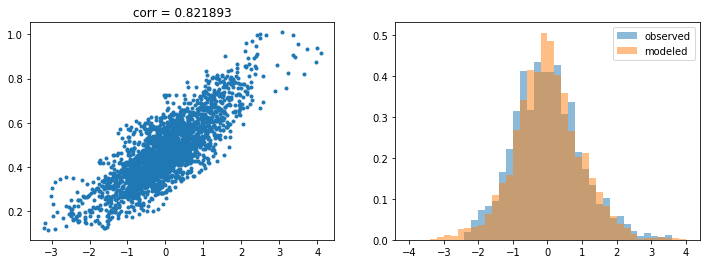

In [22]:
predict2  = regressor.predict(test_x)
yy_test   = sc3.inverse_transform(predict2[:,None])
A = sc3.inverse_transform(predict1[:,None])
yy_test   = yy_test/A.std()
test_corr = np.corrcoef(yy_test[:,0],test_y[:,0])[0,1]

print("test shape = ");print(predict2.shape)

fig,ax = plt.subplots(1,2,figsize = (12,4))

ax[0].plot(yy_test[:,0],test_y,'.')

ax[0].set_title('corr = %f'%test_corr)

bins = np.linspace(-4.0,4.0,41)

ax[1].hist(y_test.rmm2,bins,density=True,alpha=0.5,label='observed')
ax[1].hist(yy_test,bins,density=True,alpha=0.5,label='modeled');
plt.legend()

In [23]:
predict_tot = regressor.predict(test_x3)
predict_tot = sc3.inverse_transform(predict_tot[:,None])
A = sc3.inverse_transform(predict1[:,None])
predict_tot = predict_tot/A.std()

In [24]:
rmm2_predict = pd.DataFrame(predict_tot,index=x_test3.index)
rmm2_predict.to_csv('rmm2_1905_2015_svr_low_hilb_bps_36pts.txt')